<a href="https://colab.research.google.com/github/shilphypg/DSA_ICTAK/blob/main/Train_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LOAD THE LIBRARIES

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd

#data visualiztion tools
import matplotlib.pyplot as plt
import seaborn as sns

### LOAD THE DATASET

In [ ]:
#loading the dataset
df=pd.read_csv('/content/train_ctrUa4K.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#to view the rows and columns of the dataset
df.shape

(614, 13)

In [ ]:
#to view the statistics of data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


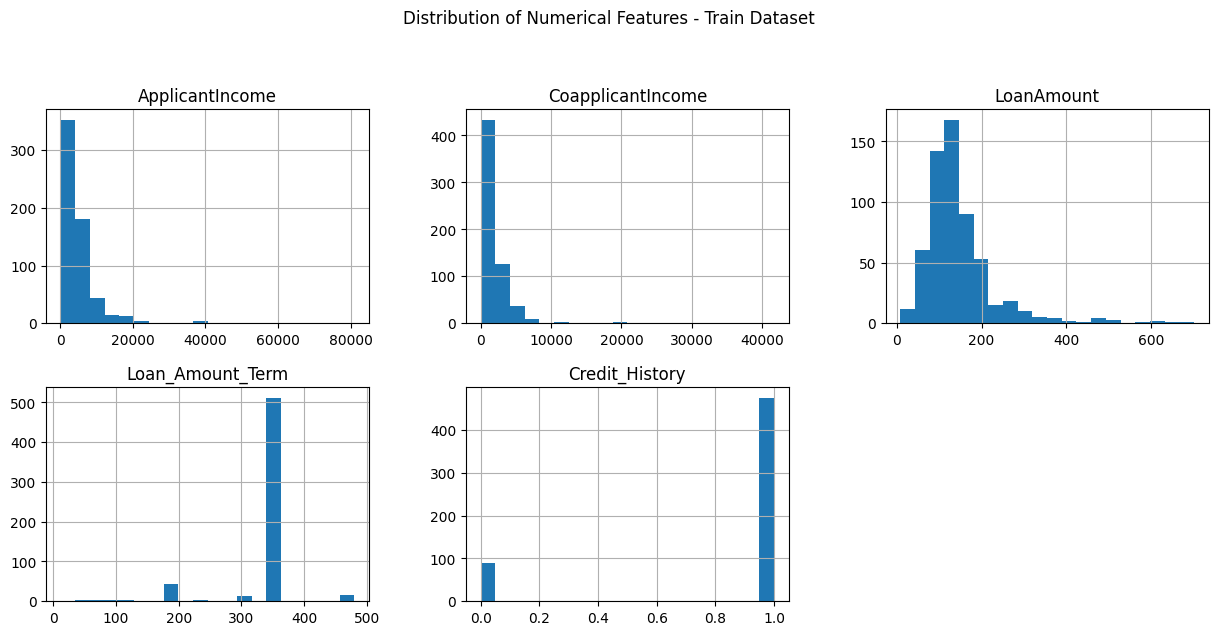

In [ ]:
#Data visualiztion
df.hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features - Train Dataset')
plt.show()

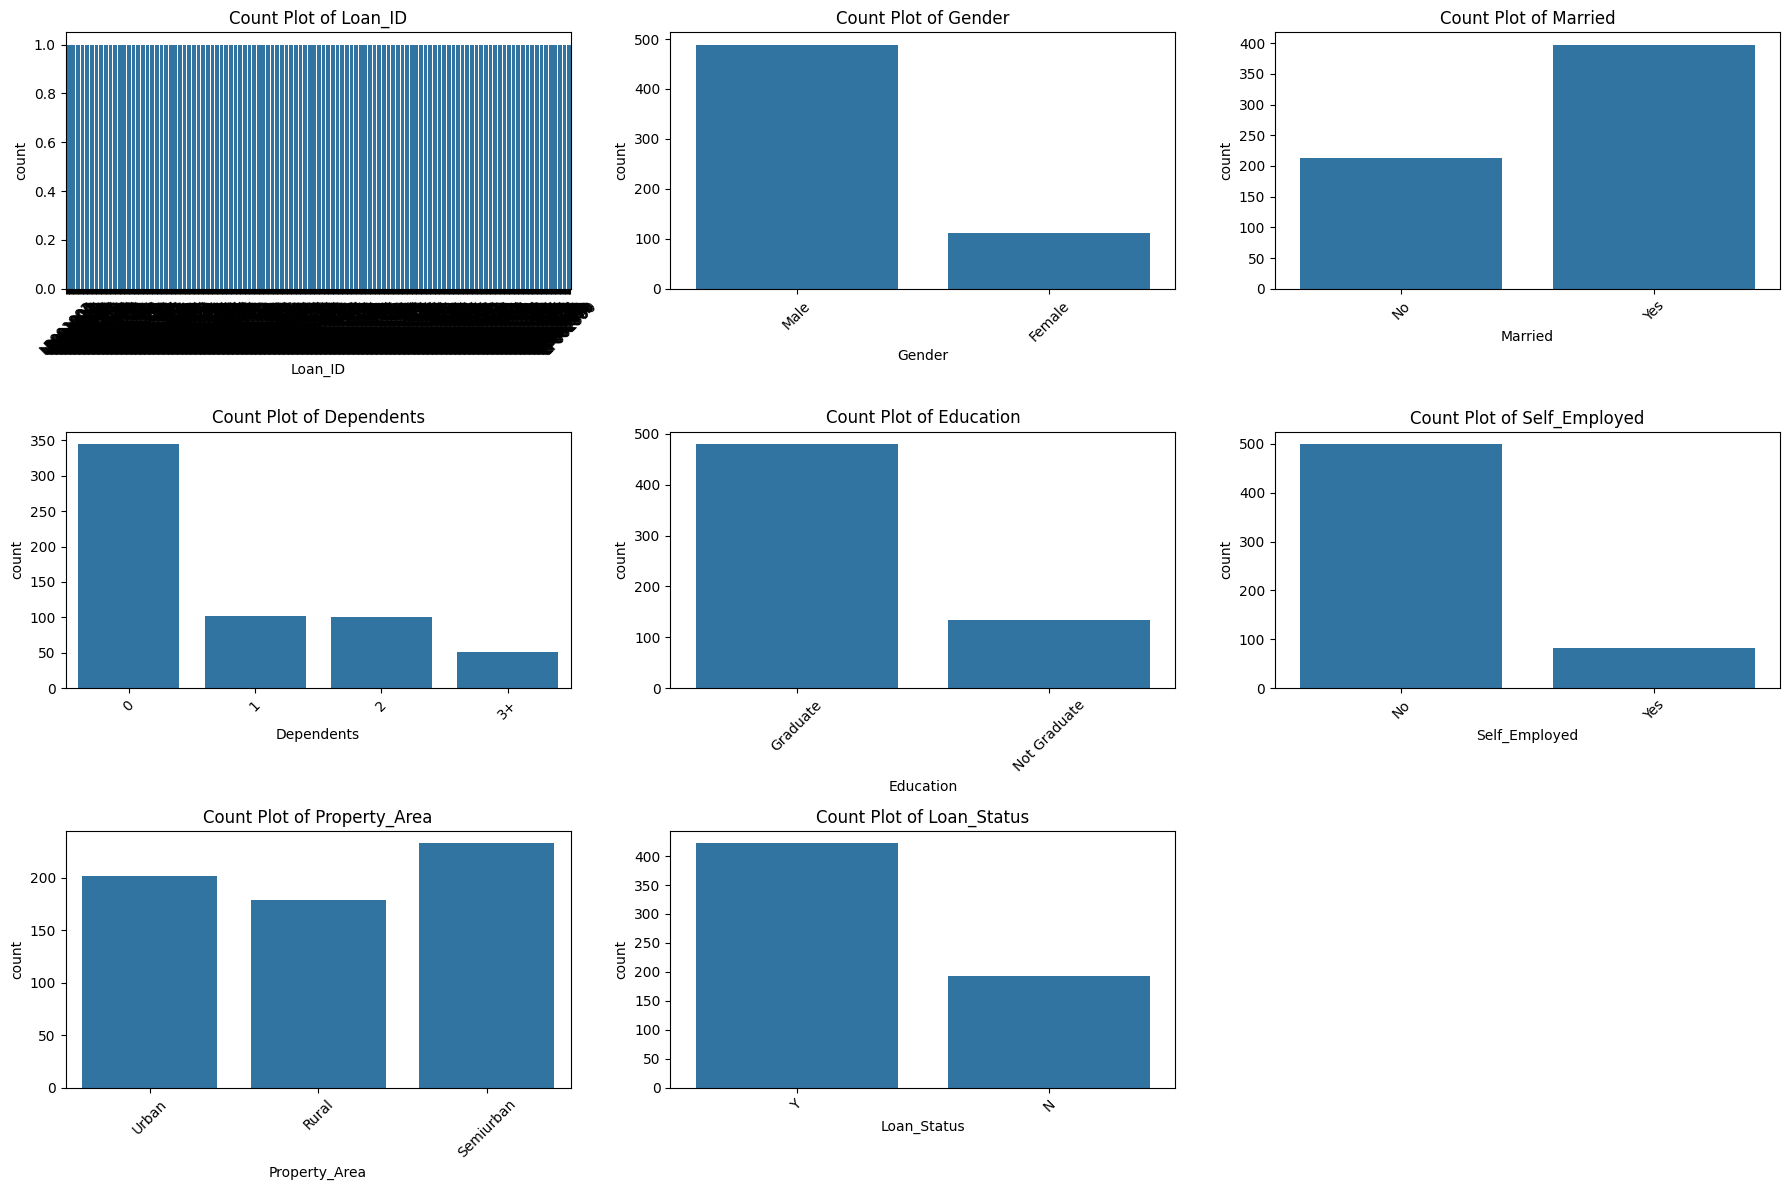

In [ ]:
# Count plots for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Check for missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### PRE-PROCESSING

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Handle missing values with SimpleImputer
# For numerical columns, use the median strategy
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
imputer_num = SimpleImputer(strategy='median')
df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])

In [ ]:
# For categorical columns, use the most frequent strategy
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [ ]:
# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
# Check for missing values
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2,Y
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,N
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2,Y
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2,Y
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2,Y


### MODELLING

### RANDOM FOREST ALGORITHM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Split the training data
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Evaluate the model
y_pred=rf_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,pos_label='Y'))
print('Recall is', recall_score(y_test, y_pred,pos_label='Y'))
print('f1 score is', f1_score(y_test,y_pred,pos_label='Y'))

Accuracy is 0.7398373983739838
Precision is 0.7448979591836735
Recall is 0.9125
f1 score is 0.8202247191011237


### LOGISTIC

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,pos_label='Y'))
print('Recall is', recall_score(y_test, y_pred,pos_label='Y'))
print('f1 score is', f1_score(y_test,y_pred,pos_label='Y'))

Accuracy is 0.7886178861788617
Precision is 0.7596153846153846
Recall is 0.9875
f1 score is 0.8586956521739131


### DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,pos_label='Y'))
print('Recall is', recall_score(y_test, y_pred,pos_label='Y'))
print('f1 score is', f1_score(y_test,y_pred,pos_label='Y'))

Accuracy is 0.6910569105691057
Precision is 0.7560975609756098
Recall is 0.775
f1 score is 0.7654320987654322


### SVM ALGORITHM

In [ ]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')
sv_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=sv_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,pos_label='Y'))
print('Recall is', recall_score(y_test, y_pred,pos_label='Y'))
print('f1 score is', f1_score(y_test,y_pred,pos_label='Y'))

Accuracy is 0.7886178861788617
Precision is 0.7596153846153846
Recall is 0.9875
f1 score is 0.8586956521739131


### K-Nearest Neighbour(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski') #p=1 manhatten, p=2 eucledeon distance
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [ ]:
metric_k

[0.7317073170731707,
 0.6829268292682927,
 0.7560975609756098,
 0.7154471544715447,
 0.7642276422764228,
 0.7154471544715447,
 0.7804878048780488,
 0.7804878048780488,
 0.7886178861788617,
 0.7886178861788617,
 0.7967479674796748,
 0.7967479674796748]

Text(0, 0.5, 'Accuracy')

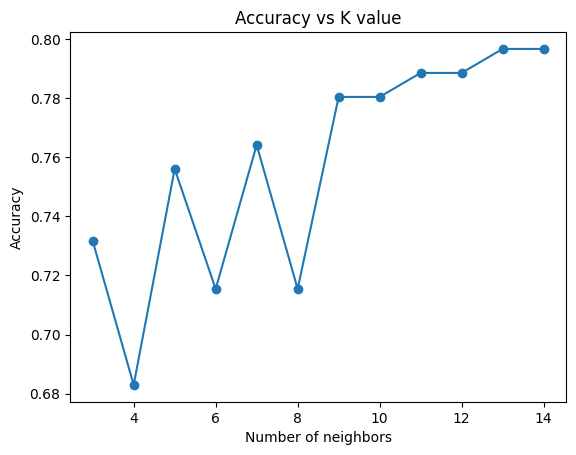

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.title('Accuracy vs K value')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [ ]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,pos_label='Y'))
print('Recall is', recall_score(y_test, y_pred,pos_label='Y'))
print('f1 score is', f1_score(y_test,y_pred,pos_label='Y'))

Accuracy is 0.7479674796747967
Precision is 0.7474747474747475
Recall is 0.925
f1 score is 0.8268156424581006


### HYPERPARAMETER(FINE TUNING)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model
y_pred_best = best_model.predict(x_test)
print(f"Best Model Validation Accuracy: {accuracy_score(y_test, y_pred_best)}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Validation Accuracy: 0.7642276422764228


In [ ]:
# Convert y_test to string labels if y_pred contains strings
y_test_str = ['Y' if label == 1 else 'N' for label in y_test]

In [ ]:
# Convert y_pred to integer labels if y_test contains integers
y_pred_int = [1 if label == 'Y' else 0 for label in y_pred]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy is', accuracy_score(y_test_str, y_pred))
print('Precision is', precision_score(y_test_str, y_pred, pos_label='Y'))
print('Recall is', recall_score(y_test_str, y_pred, pos_label='Y'))
print('F1 score is', f1_score(y_test_str, y_pred, pos_label='Y'))


Accuracy is 0.1951219512195122
Precision is 0.0
Recall is 0.0
F1 score is 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],  # Only relevant for 'rbf', 'poly', and 'sigmoid' kernels
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

In [ ]:
# Initialize the SVM classifier
svm = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
# Predict on the validation set using the best model
y_pred_best = best_svm.predict(x_test)

# Calculate and print the evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy is', accuracy_score(y_test_str, y_pred))
print('Precision is', precision_score(y_test_str, y_pred, pos_label='Y'))
print('Recall is', recall_score(y_test_str, y_pred, pos_label='Y'))
print('F1 score is', f1_score(y_test_str, y_pred, pos_label='Y'))


Accuracy is 0.1951219512195122
Precision is 0.0
Recall is 0.0
F1 score is 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hold Out Technique

In [ ]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#alternate way to predict accuracy
print(lr.score(x_test,y_test))

0.7886178861788617


### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold_validator=KFold(10)

In [ ]:
for train_index,test_index in kfold_validator.split(X,y):
  print('Training index: ', train_index)
  print('Testing index: ', test_index)

Training index:  [ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 3

### Do Cross_Validation

In [ ]:
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(lr,X,y,cv=kfold_validator)

In [ ]:
kv_result

array([0.77419355, 0.83870968, 0.74193548, 0.77419355, 0.78688525,
       0.80327869, 0.86885246, 0.85245902, 0.80327869, 0.83606557])

In [ ]:
np.mean(kv_result)

0.8079851930195663

### Stratified Cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [ ]:
for train_index,test_index in skfold_validator.split(X,y):
  print('Training index: ', train_index)
  print('Testing index: ', test_index)

Training index:  [ 53  54  57  62  63  64  65  66  69  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 3

In [ ]:
skv_result=cross_val_score(lr,X,y,cv=skfold_validator)

In [ ]:
skv_result

array([0.80645161, 0.82258065, 0.75806452, 0.75806452, 0.78688525,
       0.78688525, 0.86885246, 0.85245902, 0.80327869, 0.83606557])

In [ ]:
np.mean(skv_result)

0.8079587519830775

In [ ]:
# Assuming x_test and test_df_copy are aligned
train_df_copy = x_test.copy()
train_df_copy['Loan_Status'] = y_pred


In [ ]:
# Check if test_df1_copy was actually meant to be the DataFrame used for predictions
# Replace 'Loan_Status' in the correct DataFrame
train_df_copy = pd.DataFrame(x_test)  # or load the original test DataFrame
train_df_copy['Loan_Status'] = y_pred

In [ ]:
# Assuming x_test is the DataFrame used for predictions
train_df_copy = x_test.copy()


In [ ]:

train_df_copy.to_csv('updated_train1_results.csv', index=False)

In [ ]:
df2=pd.read_csv('/content/updated_train1_results.csv')

In [ ]:
df2.shape

(123, 11)

In [ ]:
df.shape

(614, 13)